In [57]:
#Import necessary libs
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns #For heatmap
%matplotlib inline

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [58]:
# Train target for each location:
train_a = pd.read_parquet('data/A/train_targets.parquet')
train_b = pd.read_parquet('data/B/train_targets.parquet')
train_c = pd.read_parquet('data/C/train_targets.parquet')
train_merge = pd.read_parquet('data/merge/train_merge.parquet')

# Estimated training data for each location
X_train_estimated_a = pd.read_parquet('data/A/X_train_estimated.parquet')
X_train_estimated_b = pd.read_parquet('data/B/X_train_estimated.parquet')
X_train_estimated_c = pd.read_parquet('data/C/X_train_estimated.parquet')
X_train_estimated_merge = pd.read_parquet('data/merge/X_train_estimated_merge.parquet')


# Observed training data for each location
X_train_observed_a = pd.read_parquet('data/A/X_train_observed.parquet')
X_train_observed_b = pd.read_parquet('data/B/X_train_observed.parquet')
X_train_observed_c = pd.read_parquet('data/C/X_train_observed.parquet')
X_train_observed_merge = pd.read_parquet('data/merge/X_train_observed_merge.parquet')


# Estimated test data for each location
X_test_estimated_a = pd.read_parquet('data/A/X_test_estimated.parquet')
X_test_estimated_b = pd.read_parquet('data/B/X_test_estimated.parquet')
X_test_estimated_c = pd.read_parquet('data/C/X_test_estimated.parquet')
X_test_estimated_merge = pd.read_parquet('data/merge/X_test_estimated_merge.parquet')


,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
0,2019-06-02 22:00:00,7.7,1.230,1744.900024,0.0,0.0,1744.900024,0.0,280.299988,0.0,0.0,0.0,0.0,98.699997,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1006.799988,0.0,0.0,994.200012,1000.299988,0.0,0.0,73.099998,1006.299988,NaN,0.0,0.0,-0.0,0.1,342.834015,-3.202000,0.0,285.899994,100.0,39640.101562,3.7,-3.6,-0.8,-0.0
1,2019-06-02 22:15:00,7.7,1.229,1734.000000,0.0,0.0,1734.000000,0.0,280.299988,0.0,0.0,0.0,0.0,99.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1006.500000,0.0,0.0,993.900024,999.900024,0.0,0.0,72.199997,1006.000000,NaN,0.0,0.0,-0.0,0.2,346.294006,-3.650000,0.0,286.100006,100.0,40123.898438,3.6,-3.6,-0.6,-0.0
2,2019-06-02 22:30:00,7.7,1.228,1723.500000,0.0,0.0,1723.500000,0.0,280.299988,0.0,0.0,0.0,0.0,99.199997,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1006.099976,0.0,0.0,993.599976,999.599976,0.0,0.0,71.199997,1005.599976,NaN,0.0,0.0,-0.0,0.2,349.768005,-3.998000,0.0,286.299988,100.0,40628.300781,3.6,-3.6,-0.4,-0.0
3,2019-06-02 22:45:00,7.7,1.226,1713.400024,0.0,0.0,1713.400024,0.0,280.299988,0.0,0.0,0.0,0.0,99.400002,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1005.799988,0.0,0.0,993.299988,999.299988,0.0,0.0,70.199997,1005.299988,NaN,0.0,0.0,-0.0,0.2,353.251007,-4.247000,0.0,286.600006,100.0,41153.601562,3.5,-3.5,-0.2,-0.0
4,2019-06-02 23:00:00,7.7,1.225,1703.599976,0.0,0.0,1703.599976,0.0,280.299988,0.0,0.0,0.0,0.0,99.599998,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1005.500000,0.0,0.0,993.000000,999.000000,0.0,0.0,69.199997,1005.000000,NaN,0.0,0.0,-0.0,0.2,356.742004,-4.393000,0.0,286.799988,100.0,41699.898438,3.5,-3.5,0.0,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118664,2022-10-21 00:00:00,5.0,1.292,NaN,0.0,0.0,NaN,0.0,273.700012,0.0,0.0,0.0,0.0,2.800000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1018.400024,0.0,0.0,1005.500000,1011.799988,0.0,0.0,82.699997,1018.099976,NaN,0.0,0.0,-0.0,0.0,16.612000,-36.306000,0.0,276.899994,2.8,25791.000000,1.3,-0.4,1.2,-0.0
118665,2022-10-21 00:15:00,5.0,1.292,NaN,0.0,0.0,NaN,0.0,273.700012,0.0,0.0,0.0,0.0,2.300000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1018.299988,0.0,0.0,1005.400024,1011.700012,0.0,0.0,83.099998,1018.000000,NaN,0.0,0.0,-0.0,0.0,21.132999,-35.762001,0.0,276.799988,2.3,28560.599609,1.4,-0.6,1.2,-0.0
118666,2022-10-21 00:30:00,5.0,1.292,NaN,0.0,0.0,NaN,0.0,273.700012,0.0,0.0,0.0,0.0,1.700000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1018.200012,0.0,0.0,1005.299988,1011.599976,0.0,0.0,83.400002,1017.900024,NaN,0.0,0.0,-0.0,0.0,25.594000,-35.095001,0.0,276.600006,1.7,31317.800781,1.4,-0.8,1.2,-0.0
118667,2022-10-21 00:45:00,5.0,1.292,NaN,0.0,0.0,NaN,0.0,273.600006,0.0,0.0,0.0,0.0,1.100000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1018.000000,0.0,0.0,1005.099976,1011.400024,0.0,0.0,83.800003,1017.700012,NaN,0.0,0.0,-0.0,0.0,29.988001,-34.311001,0.0,276.500000,1.1,34062.601562,1.5,-1.0,1.1,-0.0


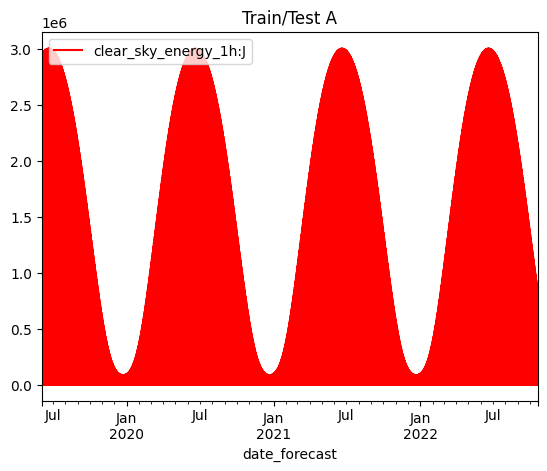

In [59]:
feature_name = 'clear_sky_energy_1h:J'
X_train_observed_a[['date_forecast', feature_name]].set_index('date_forecast').plot(title='Train/Test A', color='red')

X_train_observed_a

In [60]:

# Transforms data into hourly by mean.

test = X_train_observed_a
test['date_forecast'] = pd.to_datetime(test['date_forecast'])
test.set_index('date_forecast', inplace=True)

hourly_df = test.resample('H').mean()



In [61]:
hourly_df

,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
date_forecast,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-06-02 22:00:00,7.700,1.22825,1728.949951,0.000000,0.00,1728.949951,0.0,280.299988,0.000,0.000000,0.00,0.000000,99.074997,6.0,0.0,0.0,0.0,0.0,0.0,0.00,1.0,1006.299988,0.0,0.0,993.750000,999.775024,0.0,0.000,71.674995,1005.799988,NaN,0.0,0.0,0.0,0.175,348.036743,-3.774250,0.0,286.225006,100.000000,40386.476562,3.600,-3.575,-0.500,0.0
2019-06-02 23:00:00,7.700,1.22350,1689.824951,0.000000,0.00,1689.824951,0.0,280.299988,0.000,0.000000,0.00,0.000000,99.750000,6.0,0.0,0.0,0.0,0.0,0.0,0.00,1.0,1005.200012,0.0,0.0,992.674988,998.650024,0.0,0.025,68.000000,1004.650024,NaN,0.0,0.0,0.0,0.200,91.980751,-4.357250,0.0,286.899994,100.000000,33770.648438,3.350,-3.350,0.275,0.0
2019-06-03 00:00:00,7.875,1.21975,1563.224976,0.000000,0.00,1563.224976,0.0,280.649994,0.000,0.000000,0.00,0.000000,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.00,1.0,1004.525024,0.0,0.0,992.000000,997.974976,0.0,0.100,67.949997,1003.950012,NaN,0.0,0.0,0.0,0.400,14.934750,-3.309500,0.0,286.950012,100.000000,13595.500000,3.050,-2.950,0.750,0.0
2019-06-03 01:00:00,8.425,1.21800,1283.425049,208.649994,0.75,1283.425049,0.0,281.674988,0.300,526.775024,0.00,0.000000,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.25,1.0,1004.025024,0.0,0.0,991.500000,997.449951,0.0,0.125,73.875000,1003.449951,NaN,0.0,0.0,0.0,0.550,28.630251,-0.822500,0.0,286.750000,100.000000,2321.850098,2.725,-2.600,0.875,0.0
2019-06-03 02:00:00,8.950,1.21800,1003.500000,32468.150391,23.10,1003.500000,0.0,282.500000,11.975,22068.949219,0.15,282.975006,84.875000,6.0,0.0,0.0,0.0,0.0,0.0,1.00,0.0,1003.099976,0.0,0.0,990.550049,996.500000,0.0,0.100,79.925003,1002.500000,NaN,0.0,0.0,0.0,0.250,41.997501,3.051250,0.0,286.450012,99.224998,11634.799805,2.550,-2.350,0.925,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-20 21:00:00,5.575,1.28400,NaN,0.000000,0.00,686.900024,0.0,275.200012,0.000,0.000000,0.00,0.000000,16.275000,6.0,0.0,0.0,0.0,0.0,0.0,0.00,1.0,1019.250000,0.0,0.0,1006.375000,1012.625000,0.0,0.000,79.125000,1018.900024,NaN,0.0,0.0,0.0,0.000,329.987762,-33.860748,0.0,277.850006,19.500000,39001.398438,1.675,0.250,1.675,0.0
2022-10-20 22:00:00,5.350,1.28700,NaN,0.000000,0.00,149.500000,0.0,274.600006,0.000,0.000000,0.00,0.000000,9.700000,6.0,0.0,0.0,0.0,0.0,0.0,0.00,1.0,1018.974976,0.0,0.0,1006.099976,1012.349976,0.0,0.000,79.974998,1018.650024,NaN,0.0,0.0,0.0,0.000,347.845490,-36.270000,0.0,277.475006,9.700000,35336.726562,1.400,0.050,1.400,0.0
2022-10-20 23:00:00,5.200,1.29050,NaN,0.000000,0.00,NaN,0.0,274.174988,0.000,0.000000,0.00,0.000000,4.525000,6.0,0.0,0.0,0.0,0.0,0.0,0.00,1.0,1018.650024,0.0,0.0,1005.775024,1012.049988,0.0,0.000,81.199997,1018.349976,NaN,0.0,0.0,0.0,0.000,96.250496,-36.614998,0.0,277.149994,4.525000,27164.625000,1.300,-0.175,1.300,0.0


<Axes: title={'center': 'Train obs Hourly'}, xlabel='date_forecast'>

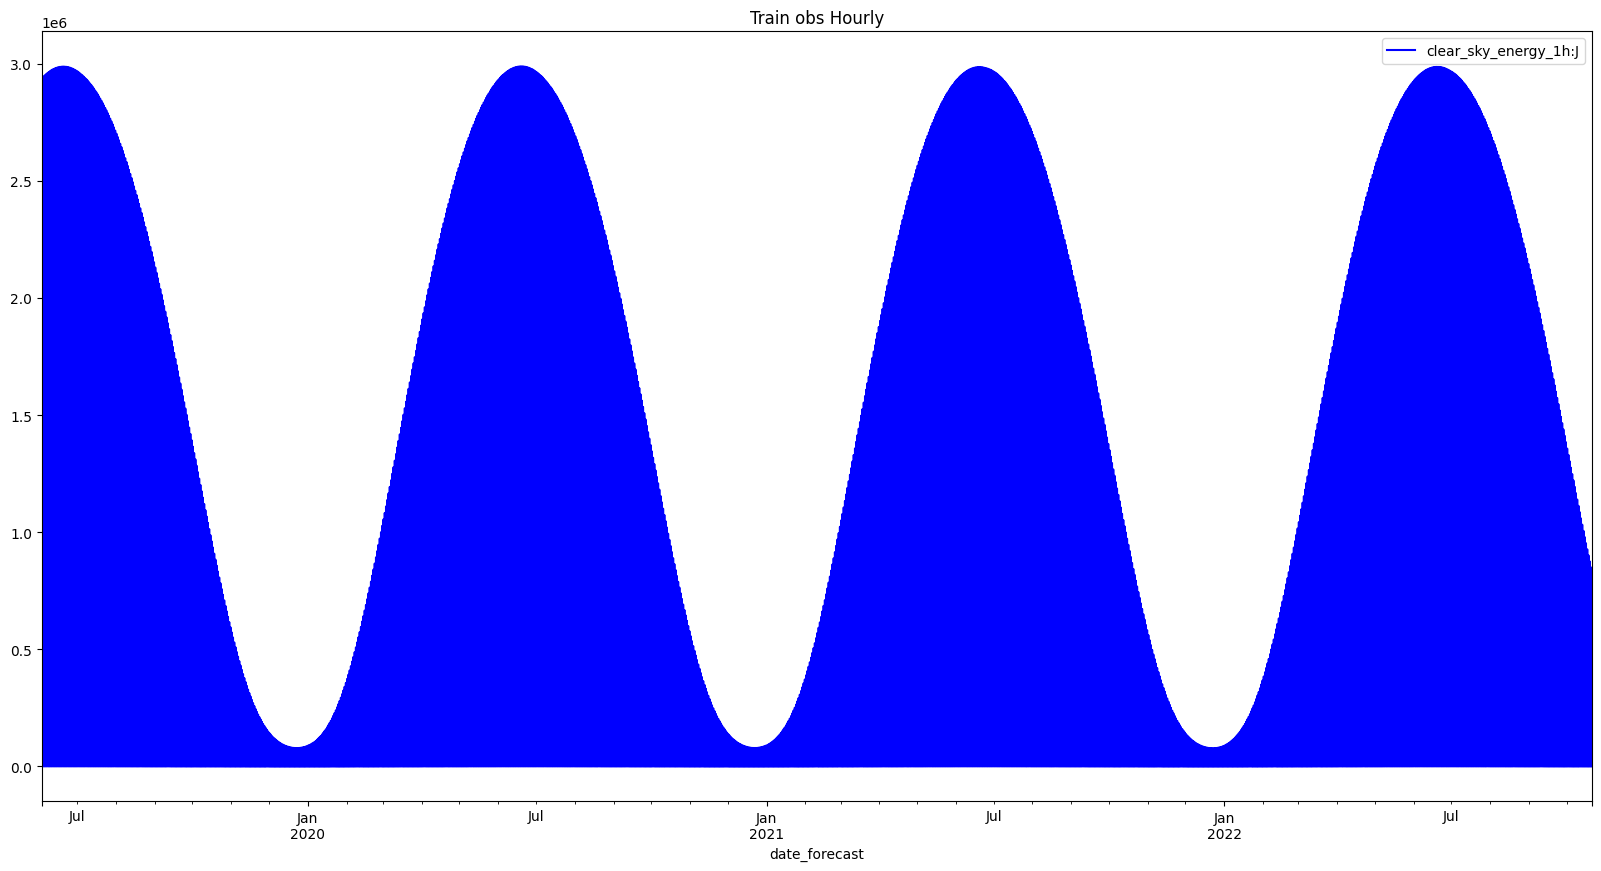

In [62]:
hourly_df.plot(y = feature_name, title='Train obs Hourly', color='blue', figsize=(20, 10))



<Axes: xlabel='date_forecast'>

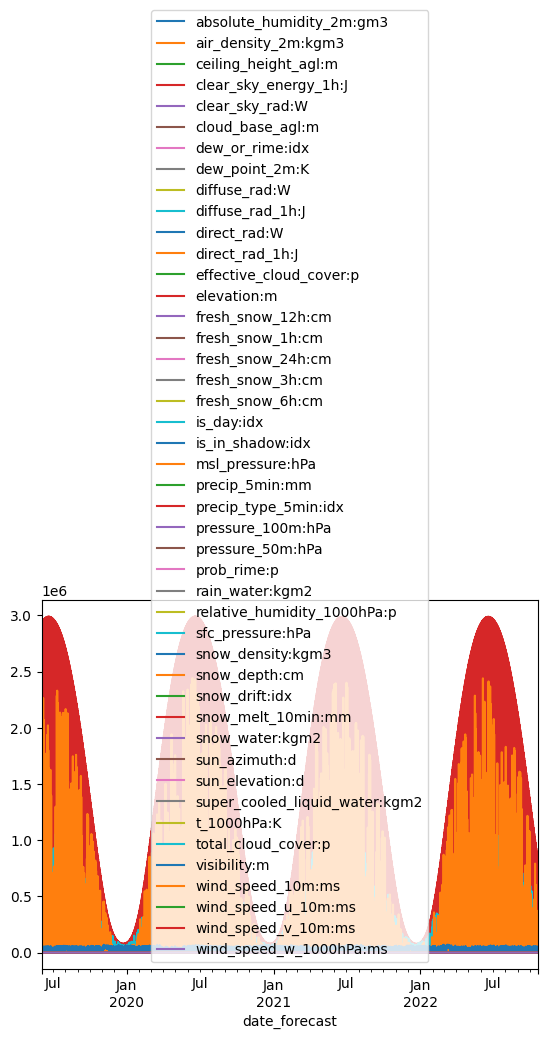

In [63]:
# hourly_df["2019-06-02":"2020-10-02"].plot()
hourly_df.plot()


<Axes: xlabel='date_forecast'>

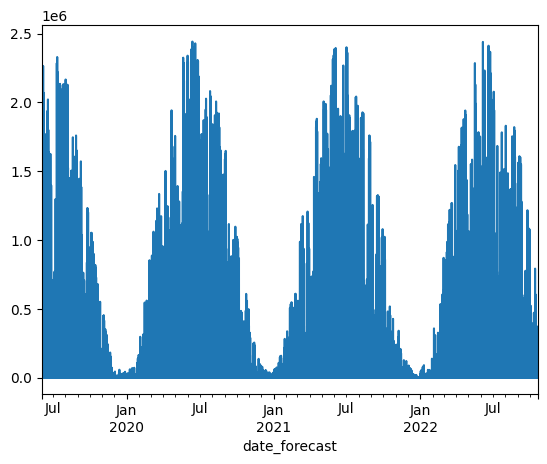

In [64]:
hourly_df['direct_rad_1h:J'].plot()


In [65]:
hourly_dir_rad = hourly_df['direct_rad_1h:J']
hourly_dir_rad.index.names = ['time']
hourly_dir_rad

time
2019-06-02 22:00:00      0.000000
2019-06-02 23:00:00      0.000000
2019-06-03 00:00:00      0.000000
2019-06-03 01:00:00      0.000000
2019-06-03 02:00:00    282.975006
                          ...    
2022-10-20 21:00:00      0.000000
2022-10-20 22:00:00      0.000000
2022-10-20 23:00:00      0.000000
2022-10-21 00:00:00      0.000000
2022-10-21 01:00:00      0.000000
Freq: H, Name: direct_rad_1h:J, Length: 29668, dtype: float32

In [66]:
# frames = [hourly_dir_rad, train_a]
hourly_dir_rad = pd.merge(hourly_dir_rad, train_a, how = 'inner', on = 'time')


In [67]:
hourly_dir_rad.set_index("time")



,direct_rad_1h:J,pv_measurement
time,,
2019-06-02 22:00:00,0.000000,0.00
2019-06-02 23:00:00,0.000000,0.00
2019-06-03 00:00:00,0.000000,0.00
2019-06-03 01:00:00,0.000000,0.00
2019-06-03 02:00:00,282.975006,19.36
...,...,...
2022-10-20 20:00:00,0.000000,0.00
2022-10-20 21:00:00,0.000000,0.00
2022-10-20 22:00:00,0.000000,0.00


In [68]:
max_rad = hourly_dir_rad['direct_rad_1h:J'].max()  
max_pv = hourly_dir_rad['pv_measurement'].max()
hourly_dir_rad['direct_rad_1h:J'] = hourly_dir_rad['direct_rad_1h:J']/max_rad
hourly_dir_rad['pv_measurement'] = hourly_dir_rad['pv_measurement']/max_pv


<Axes: >

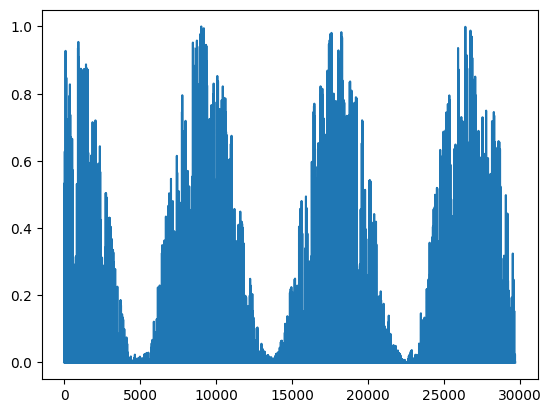

In [76]:
hourly_dir_rad['direct_rad_1h:J'].plot()

<Axes: >

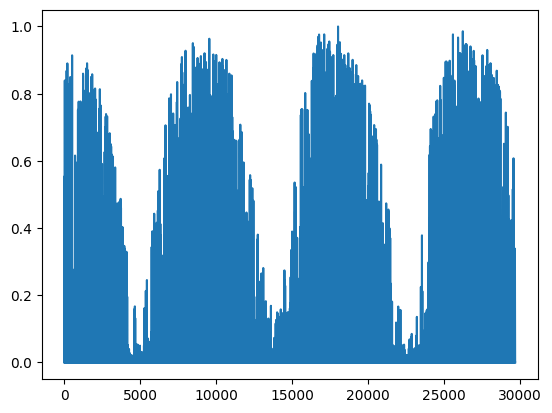

In [77]:
hourly_dir_rad['pv_measurement'].plot()
